# Machine Learning for Everybody – Full Course

Youtube Link: https://www.youtube.com/watch?v=i_LwzRVP7bg

Dataset:
Dua, D. and Graff, C. (2019). UCI Machine Learning Repository [http://archive.ics.uci.edu/ml]. Irvine, CA: University of California, School of Information and Computer Science.

Donated by: P. Savicky Institute of Computer Science, AS of CR Czech Republic savicky '@' cs.cas.cz

## Import libraries

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler

## Import data

In [4]:
cols = ["fLength", "fWidth", "fSize", "fConc", "fConc1", "fAsym", "fM3Long", "fM3Trans", "fAlpha", "fDist", "class"]
df = pd.read_csv("magic04.csv", names=cols)
df.head()

,fLength,fWidth,fSize,fConc,fConc1,fAsym,fM3Long,fM3Trans,fAlpha,fDist,class
0,28.7967,16.0021,2.6449,0.3918,0.1982,27.7004,22.0110,-8.2027,40.0920,81.8828,g
1,31.6036,11.7235,2.5185,0.5303,0.3773,26.2722,23.8238,-9.9574,6.3609,205.2610,g
2,162.0520,136.0310,4.0612,0.0374,0.0187,116.7410,-64.8580,-45.2160,76.9600,256.7880,g
3,23.8172,9.5728,2.3385,0.6147,0.3922,27.2107,-6.4633,-7.1513,10.4490,116.7370,g
4,75.1362,30.9205,3.1611,0.3168,0.1832,-5.5277,28.5525,21.8393,4.6480,356.4620,g


## Explore the Data

In [5]:
df["class"] = (df["class"] == "g").astype(int)

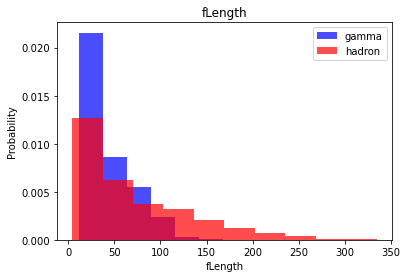

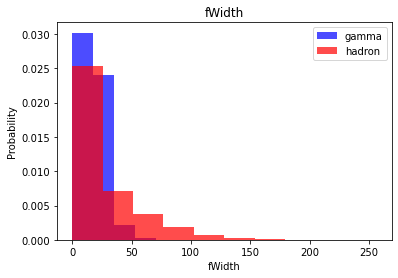

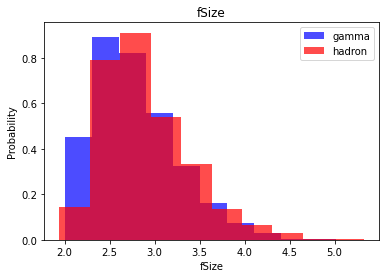

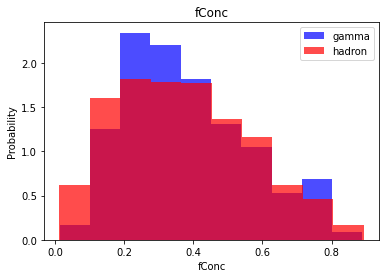

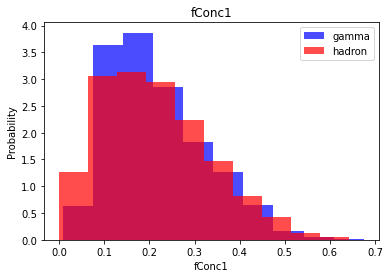

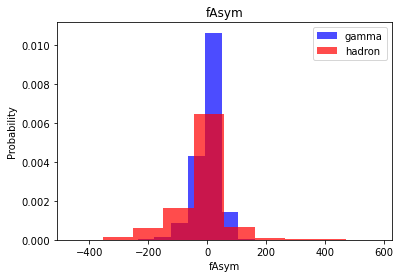

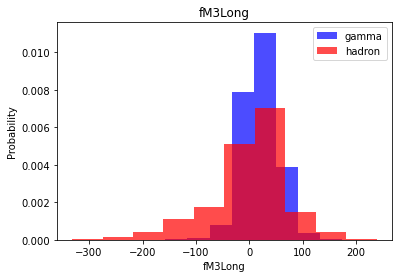

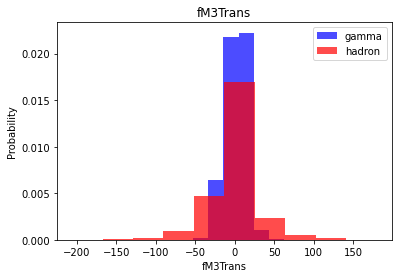

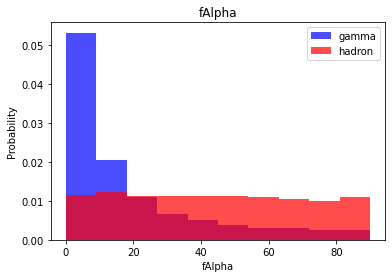

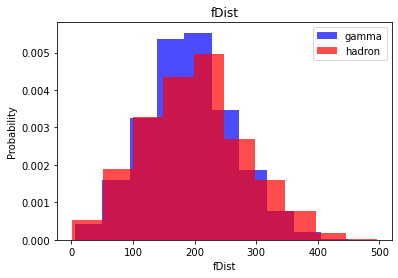

In [6]:
for label in cols[:-1]:
  # Crea un plot de class = 1,  
  plt.hist(df[df["class"]==1][label], color='blue', label='gamma', alpha=0.7, density=True)
  plt.hist(df[df["class"]==0][label], color='red', label='hadron', alpha=0.7, density=True)
  plt.title(label)
  plt.ylabel("Probability")
  plt.xlabel(label)
  plt.legend()
  plt.show()

## Prepraring the Data: 
### Train, Validation and Test Datasets

In [7]:
# Dividir la data de 0-60%, 60-80%, 80-100%
train, valid, test = np.split(df.sample(frac=1), [int(0.6*len(df)), int(0.8*len(df))])

In [10]:
def scale_dataset(dataframe, oversample=False):
  X = dataframe[dataframe.columns[:-1]].values # Select all but the last column
  y = dataframe[dataframe.columns[-1]].values # Select the last column

  scaler = StandardScaler() # Scale all columns
  X = scaler.fit_transform(X)

  if oversample: # Over value has more sample data than the other
    ros = RandomOverSampler()
    X, y = ros.fit_resample(X, y)

  data = np.hstack((X, np.reshape(y, (-1, 1))))

  return data, X, y

In [11]:
# input the train dataset to the scale_dataset function
train, X_train, y_train = scale_dataset(train, oversample=True)
# len(y_train)
# sum(y_train == 1)
# sum(y_train == 0)

# input the valid dataset to the scale_dataset function
# Oversample = False solo importa cuando se entrena el modelo
valid, X_valid, y_valid = scale_dataset(valid, oversample=False)
# input the test dataset to the scale_dataset function
test, X_test, y_test = scale_dataset(test, oversample=False)

# ---------------------------------------------------------

## k-Nearest Neighbors

The data point in green will be classifiend depending on the smaller euclidean distance from "k" number of neightbors.

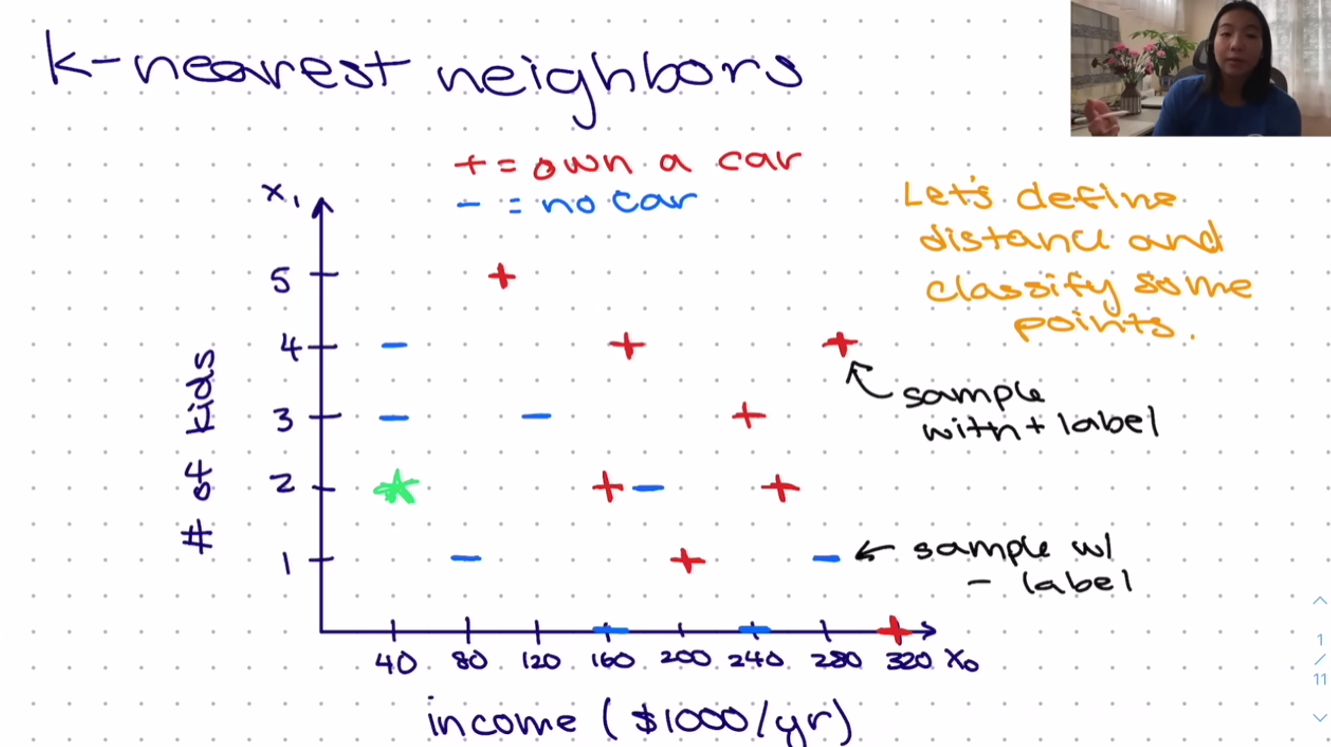

In [14]:
from IPython.display import Image, display
display(Image(filename='./Images/k-nearest.png'))

## Import Packages

In [15]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report

## Fit the data to the imported classifier

In [16]:
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train, y_train)

KNeighborsClassifier()

In [17]:
y_pred = knn_model.predict(X_test)

In [18]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.77      0.75      0.76      1335
           1       0.87      0.88      0.87      2469

    accuracy                           0.83      3804
   macro avg       0.82      0.81      0.81      3804
weighted avg       0.83      0.83      0.83      3804



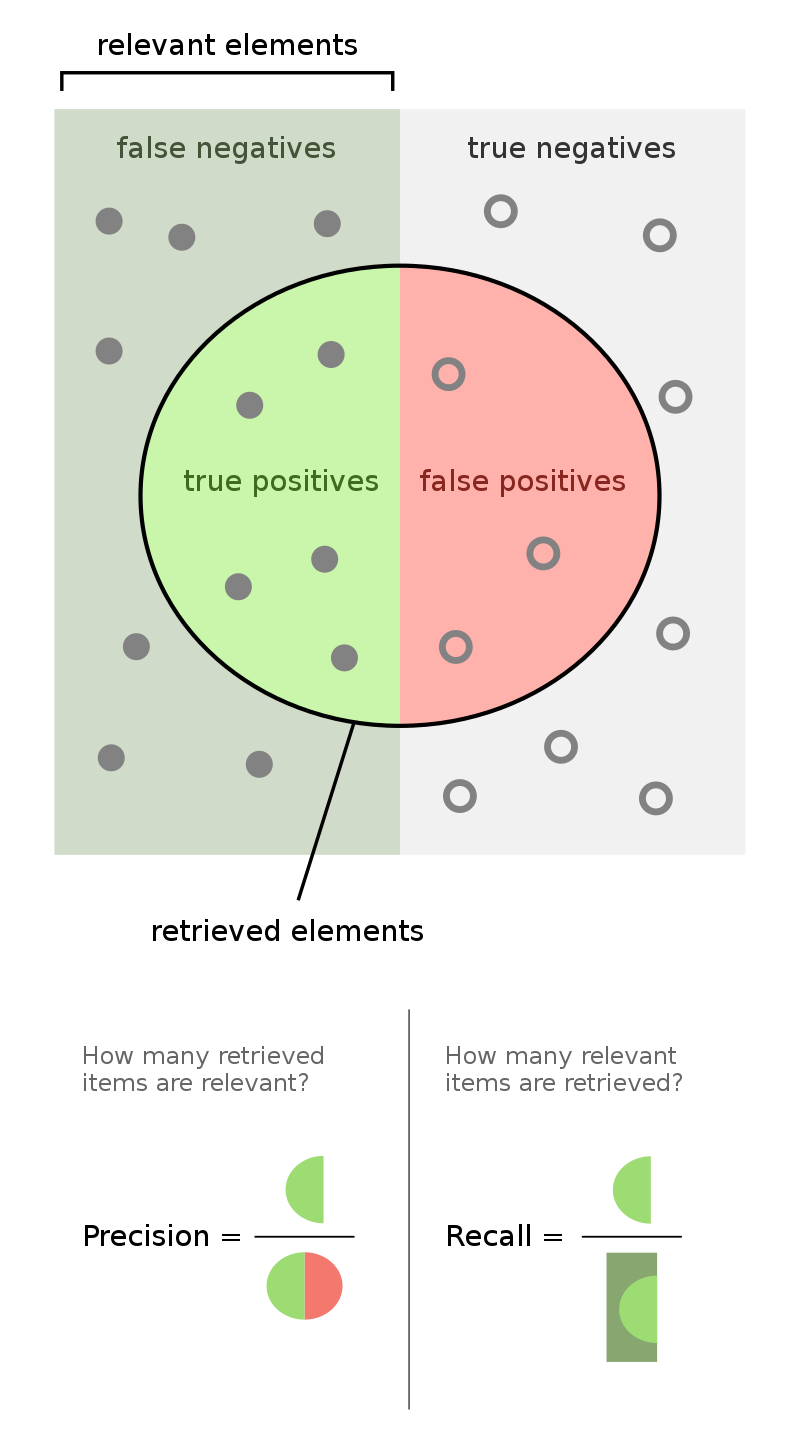

In [24]:
# La precision del modelo fue de 83%
# La precision para el label "0" fue de 77%, es decir, de los que se clasificaron como "0" el 77% realmente lo son, o el 23% fue clasificado como "0" cuando era "1".
# El recal para el label "0" fue de 75%, es decir, de los que deberian ser positivos el 75% fue correctamente clasificado, o el 25% de los "0" fueron clasificados de manera diferente a "0".
# El f-1 Score es COMO una media entre ambas medidas.


from IPython.display import Image
Image(filename='./Images/Precisionrecall.png', width=300, height=550)
# En la izquierda: 
# - Positivos clasificados como negativos
# - Positivos clasificados como positivos

# En la derecha:
# - Negativos clasificados como negativos
# - Negativos clasificados como positivos

# Precision: De todo lo clasificado como positivo, cual porcentaje es realmente positivo
# Recall: De lo que deberia ser positivo, cual porcentaje fue encontrado correctamente.


# ---------------------------------------------------------
## Naive Bayes
||positivo|negativo|
| :-:|:-:|:-:|
|positivo|positivo verdadero | falso negativo    |
|negativo|falso positivo     | negativo verdadero|


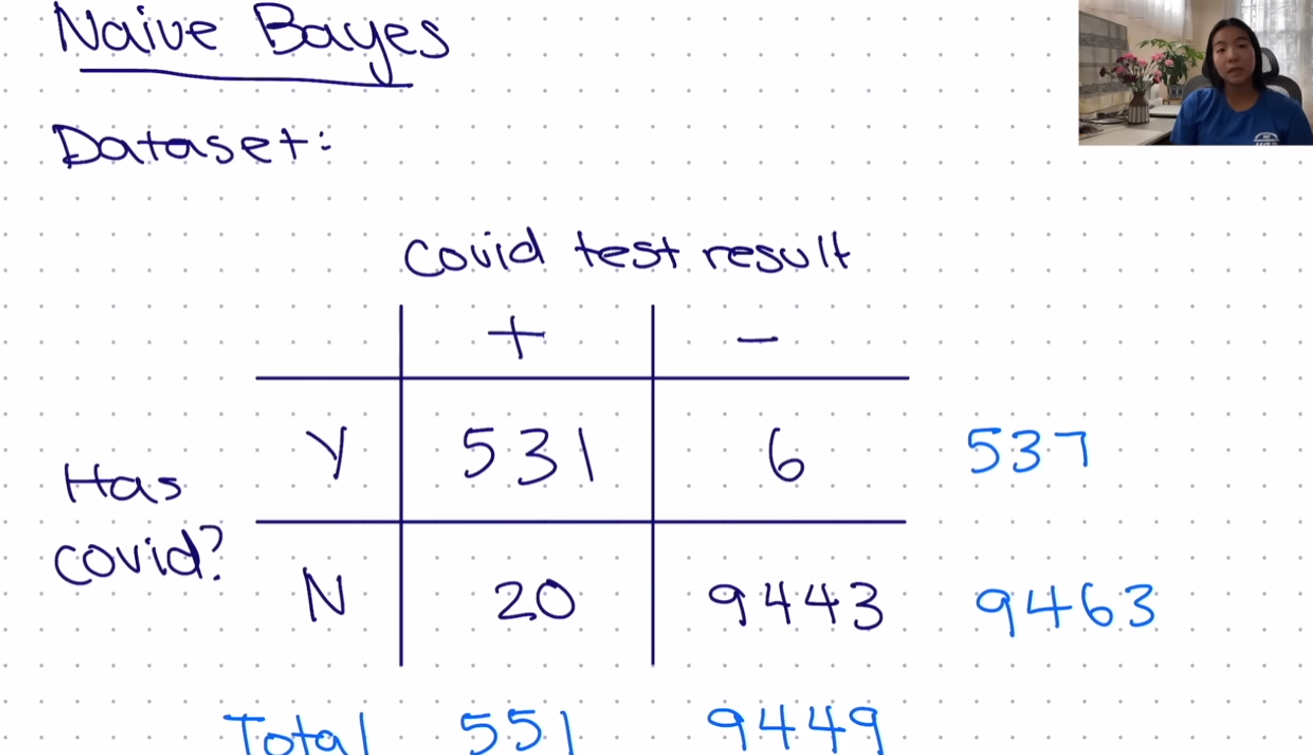

In [26]:
Image(filename='./Images/NaiveBayes.png', width=600, height=1100)


### P(covid|+test)
Probability of having COVID given a positive test? = 531/551 = 0.96

## Baye´s Rule

$$P(A|B) = \frac{P(B|A)P(A)}{P(B)}$$

## Naive Bayes 

$$P(C_k|x) = \frac{P(c|C_k)P(C_k)}{P(x)}$$ 

Where:
- Posterior: What is the probability of the feature vector "x" fitting into the "k" category  $$P(C_k|x)$$
- Likelihood: Given the "k" category, what is the Probability of x? $$P(c|C_k)$$
- Prior: Probability of "k" category regarding the other categories: $$P(C_k)$$
- Evidence: Probability of the feature vector "x" $${P(x)}$$

### Derivation

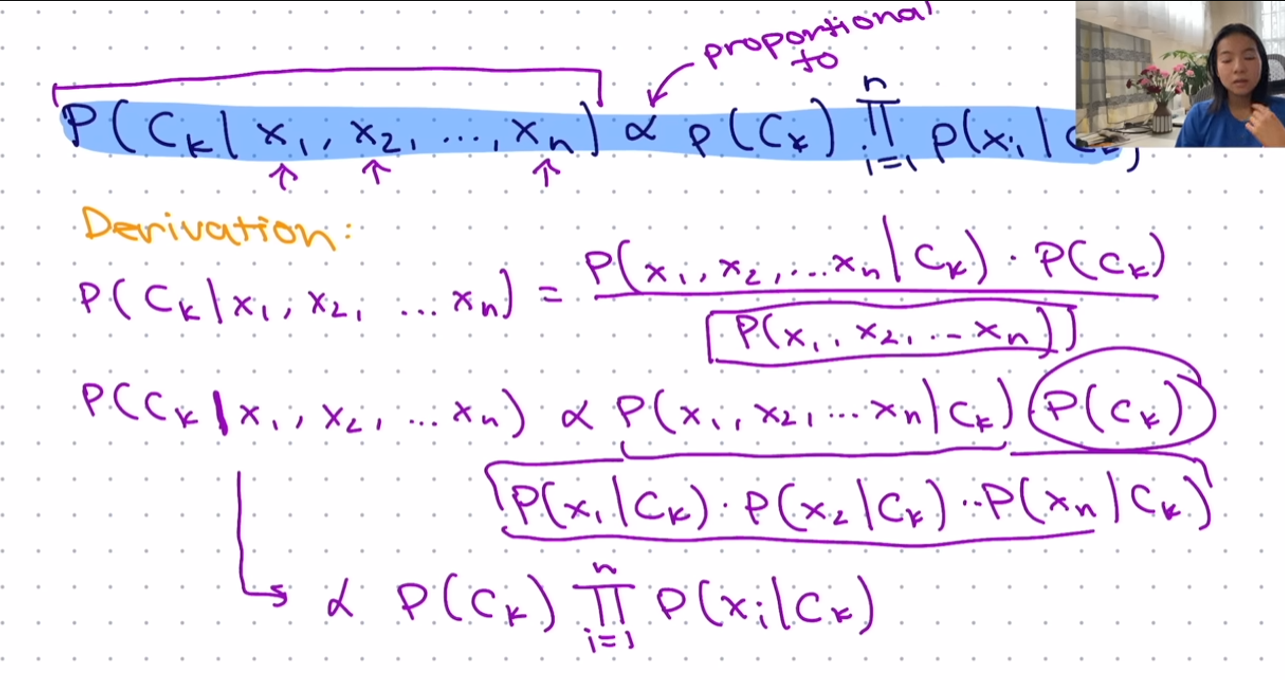

In [28]:
Image(filename='./Images/NaiveBayesDerivation.png', width=800, height=1300)
# La probabilidad de que dados los vectores X_n pertenezcan a la clasificacion C_k 
# es proporcional a la probabilidad de que ocurra la clase multiplicado por la probabilidad de que
# ocurra vector x_n dado que ocurrio la clasificacion C_k (recursivamente)

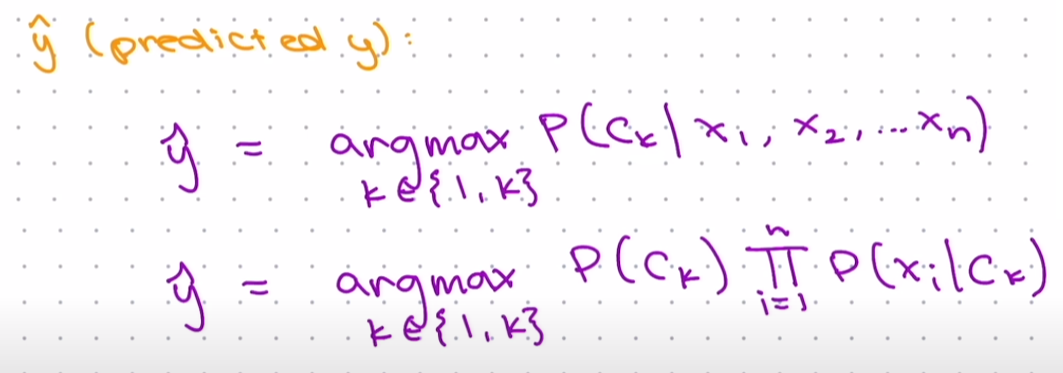

In [29]:
Image(filename='./Images/NaiveBayesArgmax.png', width=800, height=1300)
# Vamos a seleccionar la K que maximiza el valor de la y_predecida
# Seleccionar la K mas probable para minimizar la probabilidad de error en claisficacion


In [30]:
from sklearn.naive_bayes import GaussianNB

In [31]:
nb_model = GaussianNB()
nb_model = nb_model.fit(X_train, y_train)

In [32]:
y_pred = nb_model.predict(X_test)
print(classification_report(y_test, y_pred))

# Precision of the model: 73%
# Precision of 0 is 69%, 31% fue mal clasificado
# REcall of 0 is 42%, 58% no fue clasificado. 

              precision    recall  f1-score   support

           0       0.69      0.42      0.53      1335
           1       0.74      0.90      0.81      2469

    accuracy                           0.73      3804
   macro avg       0.72      0.66      0.67      3804
weighted avg       0.73      0.73      0.71      3804



# ---------------------------------------------------------
## Logistic Regression

Sirve para clasificadores binarios

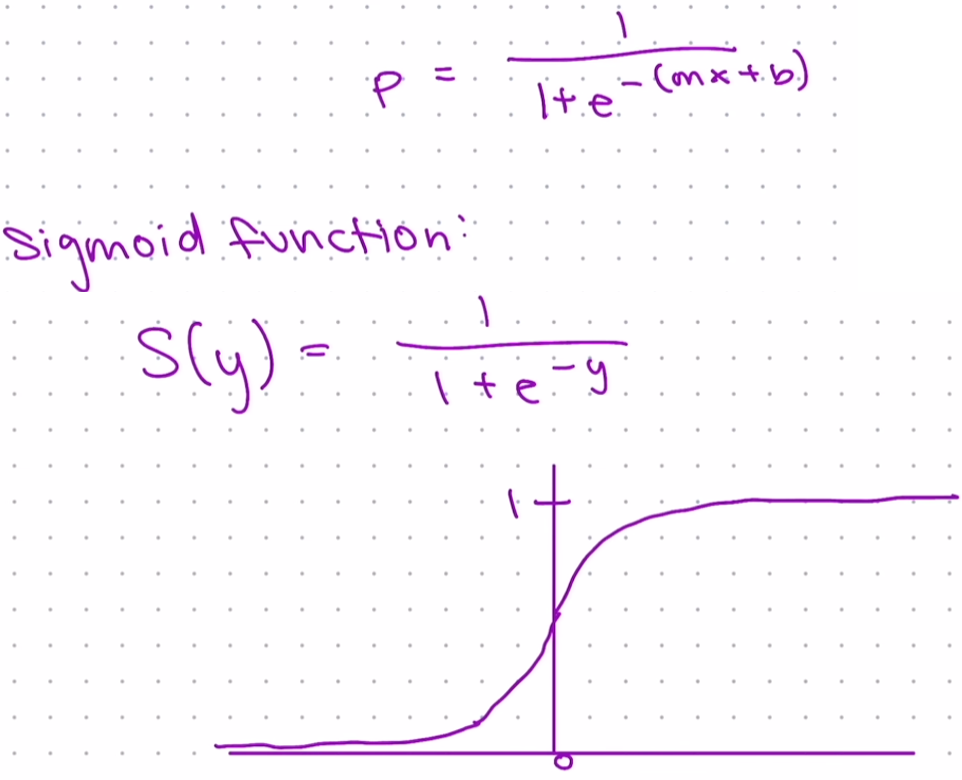

In [35]:
Image(filename='./Images/LogaritmicRegression.png', width=500, height=500)

In [36]:
from sklearn.linear_model import LogisticRegression

In [37]:
lg_model = LogisticRegression()
lg_model = lg_model.fit(X_train, y_train)

In [38]:
y_pred = lg_model.predict(X_test)
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.69      0.73      0.71      1335
           1       0.85      0.82      0.84      2469

    accuracy                           0.79      3804
   macro avg       0.77      0.78      0.77      3804
weighted avg       0.79      0.79      0.79      3804



# ---------------------------------------------------------

## Support Vector Machines (SVM)

Encontrar el plano que mejor divide tus datos y que maximiza los margenes del hiperplano
No sirve para datos con Outliers

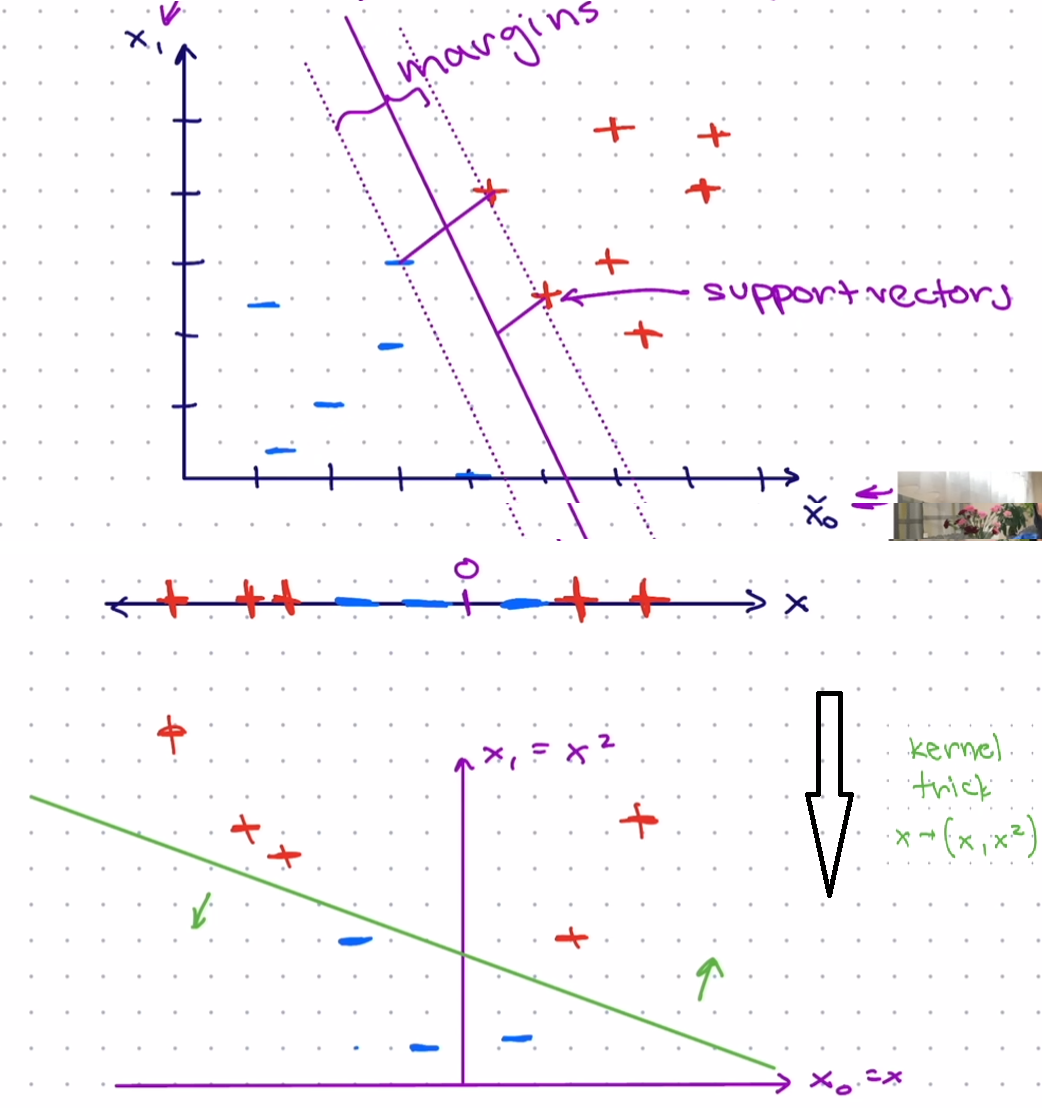

In [39]:
# ----------------
Image(filename='./Images/SVM.png', width=500, height=1000)

In [40]:
from sklearn.svm import SVC

In [41]:
svm_model = SVC()
svm_model = svm_model.fit(X_train, y_train)

In [42]:
y_pred = svm_model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.83      0.80      0.81      1335
           1       0.89      0.91      0.90      2469

    accuracy                           0.87      3804
   macro avg       0.86      0.86      0.86      3804
weighted avg       0.87      0.87      0.87      3804

